<a href="https://colab.research.google.com/github/MarAndy11/Proyecto-Bootcamp/blob/main/Calidad_de_agua%2C_Bah%C3%ADa_de_Loreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calidad del agua en Parque Nacional Bahía de Loreto 2014 - 2020


Se presenta una base de datos en la que se monitorea la calidad del agua del Parque Nacional Bahía de Loreto en el Golfo de California (Baja California) de 2014 a 2020. Se miden los siguientes parámetros; temperatura, salinidad, pH, oxígeno y unidades de enterococci por cada 100 ml de agua de mar. El muestreo se llevó a cabo en 20 localidades de caracter recreativo, 2 estuarios (Estero Nopolo y Estero La Candelaria), y 2 puntos de control expuestos a contaminación directa (Malecon y Marian Pto Escondido). 

Queremos conocer cómo se distribuye el estatus de las muestras (apto, no apto), la temperatura y ph dentro de las localidades y con base en las actividades que se llevan a cabo en ellas. 

La base de datos se obtuve de Kaggle: https://www.kaggle.com/datasets/hugoquintero/seawater-quality-pnbl-20142019 con una modificación en la columna de "timestamp".


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Master_Dataset_LCK_2014-2020 copia.csv')
datos

,id,name,type,latitude,longitude,date,hour,timestamp,temperature,salinity,ph,dis_oxy,enterococcus,status
0,SC-N1,CARCAMO MALECON,CONTROL,26.013386,-111.339279,02/01/14,13:00:00,2014,19.95,31.8,7.69,6.08,20.00,1
1,SCS1,PUERTO ESCONDIDO,CONTROL,25.814849,-111.312320,02/01/14,10:17:00,2014,19.09,31.8,7.65,6.08,0.99,1
2,SEN1,LA CANDELARIA,ESTERO,26.025014,-111.344708,02/01/14,12:40:00,2014,22.35,31.8,7.31,6.08,95.00,1
3,SES1,ESTERO NOPOLO,RECREATIVO,25.930998,-111.356266,02/01/14,10:53:00,2014,20.43,31.8,7.40,6.08,84.00,1
4,SRN1,LOS PANGONES,RECREATIVO,25.972378,-111.352629,02/01/14,13:28:00,2014,28.81,31.8,7.66,6.08,31.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,BAN 4.00,BANCO LA NEGRITA,PESQUERO,25.972652,-111.353132,23/07/20,11:01:00,2020,24.00,33.0,7.20,6.08,0.99,1
2652,BAN 5.00,BANCO MIL PALMAS,PESQUERO,26.056492,-111.329012,23/07/20,9:28:00,2020,26.00,34.0,7.20,6.08,0.99,1
2653,BAS1,BANCO ENSENADA BLANCA,PESQUERO,25.726044,-111.246157,06/08/20,9:10:00,2020,26.00,35.0,7.20,6.08,0.99,1
2654,BAS2,BANCO LIGUI,PESQUERO,25.741846,-111.258535,06/08/20,9:32:00,2020,26.00,34.0,7.20,6.08,0.99,1


# Explorando los datos


In [ ]:
datos.columns

Index(['id', 'name', 'type', 'latitude', 'longitude', 'date', 'hour',
       'timestamp', 'temperature', 'salinity', 'ph', 'dis_oxy', 'enterococcus',
       'status'],
      dtype='object')

In [ ]:
datos.shape

(2656, 14)

In [ ]:
datos.size

37184

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2656 non-null   object 
 1   name          2656 non-null   object 
 2   type          2656 non-null   object 
 3   latitude      2656 non-null   float64
 4   longitude     2656 non-null   float64
 5   date          2656 non-null   object 
 6   hour          2656 non-null   object 
 7   timestamp     2656 non-null   int64  
 8   temperature   2653 non-null   float64
 9   salinity      2653 non-null   float64
 10  ph            2595 non-null   float64
 11  dis_oxy       2601 non-null   float64
 12  enterococcus  2656 non-null   float64
 13  status        2656 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 290.6+ KB


In [ ]:
datos.describe()

,latitude,longitude,timestamp,temperature,salinity,ph,dis_oxy,enterococcus,status
count,2656.000000,2656.000000,2656.000000,2653.000000,2653.000000,2595.000000,2601.000000,2656.000000,2656.000000
mean,25.954510,-111.327315,2016.770708,25.362695,32.815944,7.448713,6.524341,346.528005,0.943148
std,0.108091,0.031571,1.671446,4.866354,1.773759,0.731796,0.556402,2128.853204,0.231604
min,25.721483,-111.356266,2014.000000,15.000000,1.000000,6.260000,4.210000,0.100000,0.000000
25%,25.922304,-111.344708,2015.000000,22.000000,32.000000,6.820000,6.080000,0.990000,1.000000
50%,26.001124,-111.338406,2017.000000,26.000000,32.500000,7.240000,6.330000,0.990000,1.000000
75%,26.022352,-111.323868,2018.000000,28.820000,33.700000,7.950000,6.900000,0.990000,1.000000
max,26.118822,-111.234901,2020.000000,35.000000,36.100000,9.980000,9.920000,24196.000000,1.000000


# EDA

 

In [ ]:
# Contabilizamos el número de muestras por localidad
datos['name'].value_counts()

CARCAMO MALECON             208
ENSENADA BLANCA             206
LA NEGRITA                  205
JUNCALITO                   205
LA PICAZON                  205
LA SALINITA                 205
LA DARSENA                  205
NOPOLO                      204
MIL PALMAS                  204
LIGUI                       148
PUERTO ESCONDIDO            138
LOS PANGONES                135
PLAYA OASIS                  70
EL QUEMADO                   69
ESTERO NOPOLO                49
LA CANDELARIA                49
BANCO LA NEGRITA             30
LOS METATES                  21
IC-ENSENADA BLANCA-NORTE     20
IC-ENSENADA BLANCA-SUR       20
BANCO MIL PALMAS             15
BANCO ENSENADA BLANCA        15
BANCO LIGUI                  15
BANCO VISTA AL MAR           15
Name: name, dtype: int64

In [ ]:
# Contabilizamos el número de muestras por tipo de actividad
datos['type'].value_counts()

RECREATIVO    2171
CONTROL        346
PESQUERO        90
ESTERO          49
Name: type, dtype: int64

In [ ]:
# Del total de las muestras, cuántas son aptas (1) y cuántas no aptas (0)
datos.groupby(['status']).count()['name']

status
0     151
1    2505
Name: name, dtype: int64

In [ ]:
# Cómo se distribuyen las muestras aptas y no aptas de acuerdo a la actividad de cada localidad
datos.groupby(['status','type']).count()['name']

status  type      
0       CONTROL         35
        ESTERO           5
        PESQUERO         4
        RECREATIVO     107
1       CONTROL        311
        ESTERO          44
        PESQUERO        86
        RECREATIVO    2064
Name: name, dtype: int64

In [ ]:
grouped_type = datos.groupby(['status','type']).count()['name']
grouped_type.unstack(level=0)

status,0,1
type,,
CONTROL,35,311
ESTERO,5,44
PESQUERO,4,86
RECREATIVO,107,2064


status  type      
0       CONTROL         35
        ESTERO           5
        PESQUERO         4
        RECREATIVO     107
1       CONTROL        311
        ESTERO          44
        PESQUERO        86
        RECREATIVO    2064
Name: name, dtype: int64


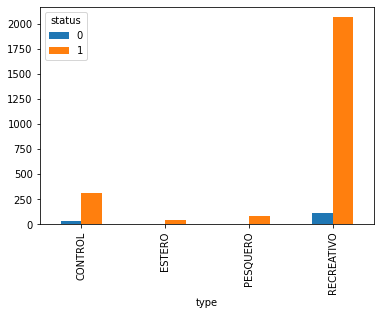

In [ ]:
grouped_type = datos.groupby(['status','type']).count()['name']
print(grouped_type)
(grouped_type.unstack(level=0).plot.bar())
plt.show()

Lo que observamos en la gráfica es la distribución de las muestras de acuerdo a la actividad que se realiza en las localidades, además de su estatus. Lo que podemos inferir es que gran parte de las muestras tomadas en zonas recreativas son aptas, lo cual tiene sentido dado que son zonas que se mantienen conservadas para el uso humano. No obstante, también hay muestras dentro de éstas zonas que no son aptas, lo cual, con investigación más detallada, podría reflejar el estado de conservación de las mismas.

Algo muy similar ocurre en las zonas de Estero y Pesqueras, aunque cabe resaltar que el número de muestras tomadas en estas zonas es menor que el número de muestras tomadas en zonas recreativas y pesqueras.

Finalmente dentro del control observamos que hay un número elevado de muestras aptas. Esto podría llevarnos a varios cuestionamientos; si hace falta que las cualidades impuestas para las muestras aptas sean más rígidas, o si el que una muestra sea apta o no, depende en su mayoría de los niveles de enterococci y en menor instancia de las demás variables. 

In [ ]:
# Regresando a los datos, hay algunas filas con datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2656 non-null   object 
 1   name          2656 non-null   object 
 2   type          2656 non-null   object 
 3   latitude      2656 non-null   float64
 4   longitude     2656 non-null   float64
 5   date          2656 non-null   object 
 6   hour          2656 non-null   object 
 7   timestamp     2656 non-null   int64  
 8   temperature   2653 non-null   float64
 9   salinity      2653 non-null   float64
 10  ph            2595 non-null   float64
 11  dis_oxy       2601 non-null   float64
 12  enterococcus  2656 non-null   float64
 13  status        2656 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 290.6+ KB


Observando los datos de temperatura y ph. Se tomó la decisión de imputar la mediana de ambos parámetros, respectivamente, en los datos faltantes. Si bien en ambas columnas los datos faltates no superan las 60 filas para un total de 2656 registros, los valores tanto de temperatura como de ph no representan gran variación entre ellos.

In [ ]:
# Rellenemos datos
datos['temperature'].median()

26.0

In [ ]:
# imputar en datos faltantes la mediana de la temperatura
datos['temperature'] = datos['temperature'].fillna(26.0)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2656 non-null   object 
 1   name          2656 non-null   object 
 2   type          2656 non-null   object 
 3   latitude      2656 non-null   float64
 4   longitude     2656 non-null   float64
 5   date          2656 non-null   object 
 6   hour          2656 non-null   object 
 7   timestamp     2656 non-null   int64  
 8   temperature   2656 non-null   float64
 9   salinity      2653 non-null   float64
 10  ph            2595 non-null   float64
 11  dis_oxy       2601 non-null   float64
 12  enterococcus  2656 non-null   float64
 13  status        2656 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 290.6+ KB


In [ ]:
datos['ph'].median()

7.24

In [ ]:
# imputar en datos faltantes la mediana de ph
datos['ph'] = datos['ph'].fillna(7.24)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2656 non-null   object 
 1   name          2656 non-null   object 
 2   type          2656 non-null   object 
 3   latitude      2656 non-null   float64
 4   longitude     2656 non-null   float64
 5   date          2656 non-null   object 
 6   hour          2656 non-null   object 
 7   timestamp     2656 non-null   int64  
 8   temperature   2656 non-null   float64
 9   salinity      2653 non-null   float64
 10  ph            2656 non-null   float64
 11  dis_oxy       2601 non-null   float64
 12  enterococcus  2656 non-null   float64
 13  status        2656 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 290.6+ KB


# Visualización 

En la siguiente gráfica lo que observamos es la variación de la temperatura a través de los años de muestreo. De aquí podemos inferir que las diferentes temperaturas registradas se distribuyen uniformemente a lo largo de las fechas indicadas. Las temperaturas más altas, por su parte, se registran sobre todo en los años 2017, 2018 y 2019. Mientras que en los años 2015 y 2016las temperaturas no sobrepasan 35º C. Finalmente para el 2020 se observan los registros de temperatura más bajos, aunque esto también puede atribuirse al número de muestras tomadas en ese año. 

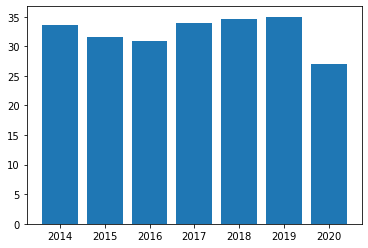

In [ ]:
plt.bar(datos['timestamp'], datos['temperature'])
plt.show()

Al igual que en la temperatura, observamos la variación de las muestras de ph a lo largo de los años. Para el 2016 y 2019 los valores alcanzaron las 10 unidades de ph, mientras que para 2015, 2018 y 2018 las máximas no sobrepasaron las 9 unidades. En caso del 2020 pasa algo similar con la temperatura, teniendo valores menores a 8. 

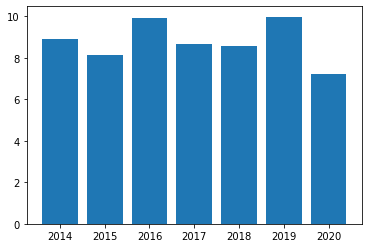

In [ ]:
plt.bar(datos['timestamp'], datos['ph'])
plt.show()

Posteriormente se evaluó el parámetro de temperatura a lo largo de los años, tomando en cuenta las localidades muestreadas.

In [ ]:
import altair as alt
from vega_datasets import data

source = datos

lines = (
    alt.Chart(source)
    .mark_line()
    .encode(x="timestamp", y="temperature", color="name")
)

lines 

alt.Chart(...)

Se repitió éste mismo análisis pero ahora tomando en cuenta el estatus (apto, no apto) de las muestras

In [ ]:
import altair as alt
from vega_datasets import data

source = datos

lines = (
    alt.Chart(source)
    .mark_line()
    .encode(x="timestamp", y="temperature", color="status")
)

lines 

alt.Chart(...)

Además se realizaron gráficas para medir el ph, a lo largo de los años de acuerdo a localidad y estatus.

In [ ]:
import altair as alt
from vega_datasets import data

source = datos

lines = (
    alt.Chart(source)
    .mark_line()
    .encode(x="timestamp", y="ph", color="name")
)

lines 

alt.Chart(...)

In [ ]:
import altair as alt
from vega_datasets import data

source = datos

lines = (
    alt.Chart(source)
    .mark_line()
    .encode(x="timestamp", y="ph", color="status")
)

lines 

alt.Chart(...)

Finalmente, se graficaron nuevamente los parámetros de ph y temperatura ésta vez tomando en cuenta su distribución a lo largo de las localidades y tipo de actividad que en ellas se realizan.

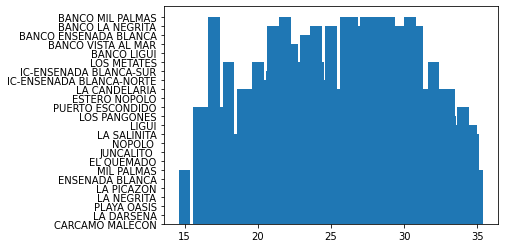

In [ ]:
plt.bar(data['temperature'], data['name'])
plt.show()

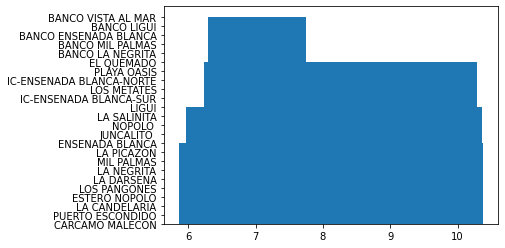

In [ ]:
plt.bar(data['ph'], data['name'])
plt.show()

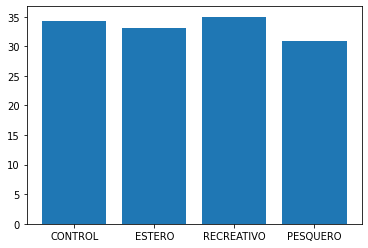

In [ ]:
plt.bar(data['type'], data['temperature'])
plt.show()

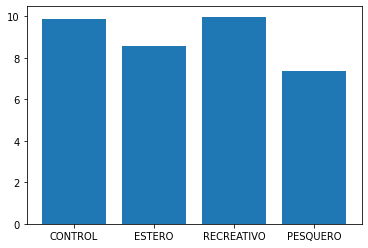

In [ ]:
plt.bar(data['type'], data['ph'])
plt.show()

# Hallazgos y conclusiones

* La calidad del agua y su aptitud o no para el uso humano depende de varios parámetros que se mantienen más o menos constantes a lo largo de los años.  
* Los parámetros aquí analizados pueden darnos un aproximado de la calidad del agua. De ahí que podamos tomar decisiones en cuanto a conservación.
* Tomar en cuenta las condiciones externas y realizar estudios más limitados (por ejemplo por región, temporada, etc..) puede ayudarnos a comprender mejor los cambios en los parámetros a lo largo del tiempo.
